In [17]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [28]:
# Mouse callback function
def get_coordinates(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"Coordinates: ({x}, {y})")
        
        # Show coordinates on the image
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_1, f"{x},{y}", (x, y),
                    font, 0.5, (255, 0, 0), 2)
        cv2.imshow("Image", img_1)

# Load image
img = cv2.imread("source/img_4.jpg")
img_1 = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Create window and bind mouse function
cv2.imshow("Image", img_1)
cv2.setMouseCallback("Image", get_coordinates)

cv2.waitKey(0)
cv2.destroyAllWindows()


Coordinates: (125, 93)
Coordinates: (61, 137)
Coordinates: (302, 181)
Coordinates: (211, 234)


In [29]:
pt1=[125,93] # top-left
pt2=[61,137] # bottom-left
pt3= [302,181] # top-right
pt4=[211,234] # bottom-right

In [30]:
# calculating the distance between points ( Pythagorean theorem ) 
height_1 = np.sqrt(((pt1[0] - pt2[0]) ** 2) + ((pt1[1] - pt2[1]) ** 2))
height_2 = np.sqrt(((pt3[0] - pt4[0]) ** 2) + ((pt3[1] - pt4[1]) ** 2))
 
width_1 = np.sqrt(((pt1[0] - pt3[0]) ** 2) + ((pt1[1] - pt3[1]) ** 2))
width_2 = np.sqrt(((pt2[0] - pt4[0]) ** 2) + ((pt2[1] - pt4[1]) ** 2))
 
max_height=max(int(height_1), int(height_2))
max_width = max(int(width_1), int(width_2))
 
print(max_height,max_width) #  --> 842 596 in my case


105 197


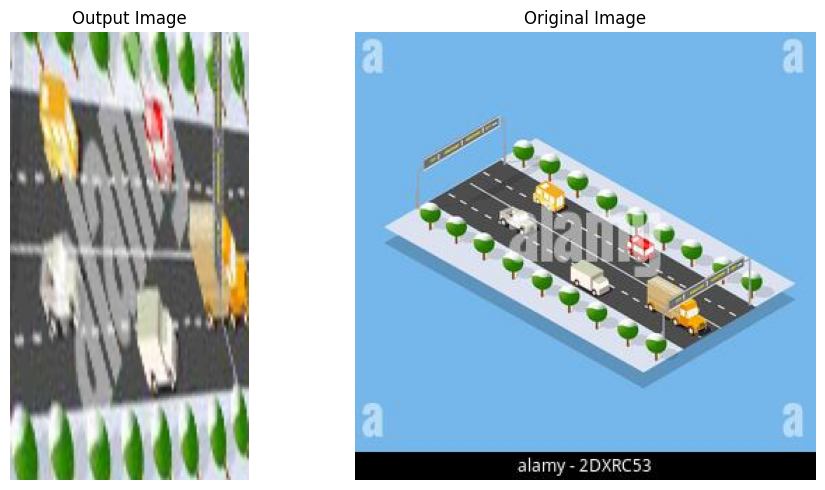

In [31]:
# four input point 
input_pts=np.float32([pt1,pt2,pt3,pt4])
 
# output points for new transformed image
output_pts = np.float32([[0, 0],
                        [0, max_width],
                        [max_height , 0],
                        [max_height , max_width]])
 
 
# Compute the perspective transform M
M = cv2.getPerspectiveTransform(input_pts,output_pts)
 
out = cv2.warpPerspective(img,M,(max_height, max_width),flags=cv2.INTER_LINEAR)

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.imshow(out)
plt.title("Output Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.tight_layout()
plt.show()